In [1]:
import geoengine as ge
import numpy as np

In [2]:
ge.initialize("http://localhost:3030/api")

In [3]:
blue = ge.workflow_builder.operators.GdalSource(
    "_:bf888259-e4dd-4872-ac4a-f6d1f05a5014:`datasets/SENTINEL-2/L2A/UTM32N/B02`"
)
green = ge.workflow_builder.operators.GdalSource(
    "_:bf888259-e4dd-4872-ac4a-f6d1f05a5014:`datasets/SENTINEL-2/L2A/UTM32N/B03`"
)
red = ge.workflow_builder.operators.GdalSource(
    "_:bf888259-e4dd-4872-ac4a-f6d1f05a5014:`datasets/SENTINEL-2/L2A/UTM32N/B04`"
)

In [4]:
query = ge.QueryRectangle(
    ge.BoundingBox2D(482500, 5627500, 483500, 5628500),
    ge.TimeInterval(np.datetime64("2020-07-01T12:00:00.000Z"), np.datetime64("2020-07-03T12:00:00.000Z")),
    ge.SpatialResolution(10, 10),
    srs="EPSG:32632",
)

/tmp/ipykernel_152924/4108502645.py:3: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ge.TimeInterval(np.datetime64("2020-07-01T12:00:00.000Z"), np.datetime64("2020-07-03T12:00:00.000Z")),


In [5]:
# statistics_workflow_json = {
#     "type": "Plot",
#     "operator": {
#         "type": "Statistics",
#         "params": {
#         },
#         "sources": {
#             "source": [
#                 blue.to_workflow_dict()["operator"],
#                 green.to_workflow_dict()["operator"],
#                 red.to_workflow_dict()["operator"]
#             ]
#         }
#     }
# }

# print(statistics_workflow_json)

# statistics_workflow = ge.register_workflow(statistics_workflow_json)

# statistics_plot = statistics_workflow.plot_json(query)

# statistics_plot

In [6]:
min_value = 1
max_value = 20448.0

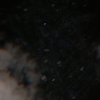

In [7]:
from geoengine.colorizer import Colorizer
from geoengine.types import SingleBandRasterColorizer


rgb_workflow_json = {
    "type": "Raster",
    "operator": {
        "type": "Rgb",
        "params": {
            "redMin": min_value,
            "redMax": max_value,
            "redScale": 1,
            "greenMin": min_value,
            "greenMax": max_value,
            "greenScale": 1,
            "blueMin": min_value,
            "blueMax": max_value,
            "blueScale": 1,
        },
        "sources": {
            "red": red.to_workflow_dict()["operator"],
            "green": green.to_workflow_dict()["operator"],
            "blue": blue.to_workflow_dict()["operator"],
        },
    },
}

rgb_workflow = ge.register_workflow(rgb_workflow_json)

rgb_workflow.wms_get_map_as_image(
    query,
    SingleBandRasterColorizer(band=0, band_colorizer=Colorizer.rgba()),
)

In [ ]:
from geoengine.colorizer import Colorizer
from geoengine.types import SingleBandRasterColorizer


rgb_workflow_json2 = {
    "type": "Raster",
    "operator": {
        "type": "Rgb",
        "params": {
            "redMin": min_value,
            "redMax": max_value / 2.0,
            "redScale": 1,
            "greenMin": min_value,
            "greenMax": max_value / 2.0,
            "greenScale": 1,
            "blueMin": min_value,
            "blueMax": max_value / 2.0,
            "blueScale": 1,
        },
        "sources": {
            "red": red.to_workflow_dict()["operator"],
            "green": green.to_workflow_dict()["operator"],
            "blue": blue.to_workflow_dict()["operator"],
        },
    },
}

rgb_workflow2 = ge.register_workflow(rgb_workflow_json2)

query2 = ge.QueryRectangle(
    ge.BoundingBox2D(482500, 5627500, 483500, 5628500),
    ge.TimeInterval(np.datetime64("2020-07-01T12:00:00.000Z"), np.datetime64("2020-07-03T12:00:00.000Z")),
    ge.SpatialResolution(1, 1),
    srs="EPSG:32632",
)

rgb_workflow2.wms_get_map_as_image(
    query2,
    SingleBandRasterColorizer(band=0, band_colorizer=Colorizer.rgba()),
)